In [341]:
import numpy as np
from   plots_config    import plt,animation,plot_sets,px2inch,get_filename
from   scipy.integrate import solve_ivp as ode45

%matplotlib widget

In [342]:

def RK4(t,y0,dfdt,*args):

    Nf     = y0.size
    Nt     = t.size
    h      = t[1]-t[0]
    h2     = h/2
    y      = np.zeros((Nf,Nt))
    y[:,0] = y0

    for i in range(Nt-1):
    
        ti = t[i]
        yi = y[:,i]

        k1 = dfdt( ti   , yi      , *args )
        k2 = dfdt( ti+h2, yi+k1*h2, *args )
        k3 = dfdt( ti+h2, yi+k2*h2, *args )
        k4 = dfdt( ti   , yi+k3*h , *args )

        km = 1/6*(k1 + 2*k2 + 2*k3 + k4   )
        
        y[:,i+1] = yi + h*km
       
    return y

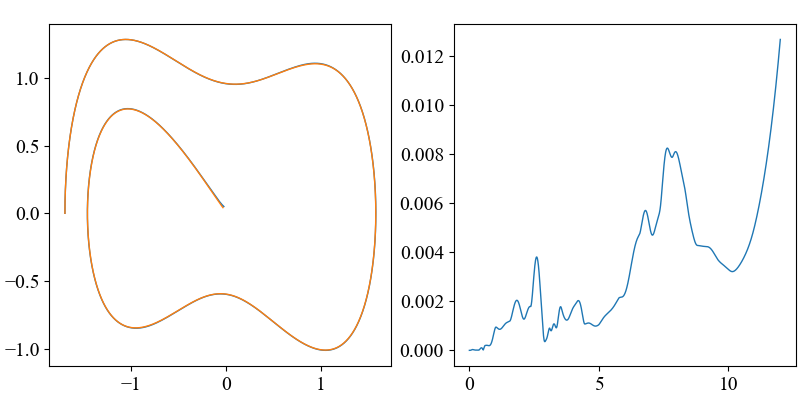

In [354]:

# second order differential equation with damping 
def dfdt(t,y,*args):
    return np.array([ y[1],               
                      y[0]-y[0]**3-args[0]*y[1]])

nframes = 10000
tf      = 12
t       = np.linspace(0,tf,nframes)

y0 = np.array([-1.701,  # x0
                0.0])   # v0
b     = 0.1
coeff =(b,)

sol = ode45(dfdt,(0,tf),y0,t_eval=t,args=coeff)
y1  = sol.y
y2  = RK4(t,y0,dfdt,*coeff)

size      = 400
size_fig  = (2*size*px2inch,size*px2inch) 
fig, ax   =  plt.subplots(1,2,constrained_layout=True,figsize=size_fig)

ax[0].plot(y1[0],y1[1],label='ode45')
ax[0].plot(y2[0],y2[1],label='RK4')
ax[0].set_box_aspect(1)

dis = np.sqrt( (y1[0]-y2[0])**2 + (y1[1]-y2[1])**2 )
ax[1].plot(t,dis)
ax[1].set_box_aspect(1)

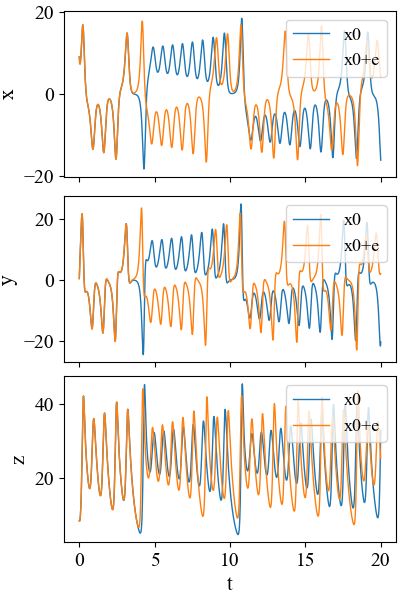

In [355]:
def dfdt(t,y,*args):
    a = args[0]
    b = args[1]
    c = args[2]
    return np.array([ a*(y[1]-y[0])       ,               
                      y[0]*(b-y[2]) - y[1],
                      y[0]*y[1]-c*y[2]    ,])

nframes = 10000
tf      = 20
t       = np.linspace(0,tf,nframes)

y0    = np.random.randn(3)*5

a     = 10
b     = 28
c     = 8/3
coeff1 = (a,b,c)

e     = 1e-2
a     = 10
b     = 28
c     = 8/3
coeff2 = (a+e,b+e,c+e)

y1 = ode45(dfdt,(0,tf),y0,t_eval=t,args=coeff1).y
y2 = ode45(dfdt,(0,tf),y0,t_eval=t,args=coeff2).y

size      = 200
size_fig  = (2*size*px2inch,3*size*px2inch) 
fig, ax   =  plt.subplots(3,1,constrained_layout=True,figsize=size_fig,sharex=True)

for i in range(3):
    ax[i].plot(t,y1[i],label=f'x0')
    ax[i].plot(t,y2[i],label=f'x0+e')
    ax[i].set_box_aspect(0.5)
    ax[i].legend()

ax[0].set_ylabel('x')
ax[1].set_ylabel('y')
ax[2].set_ylabel('z')
ax[i].set_xlabel('t')

plt.show()

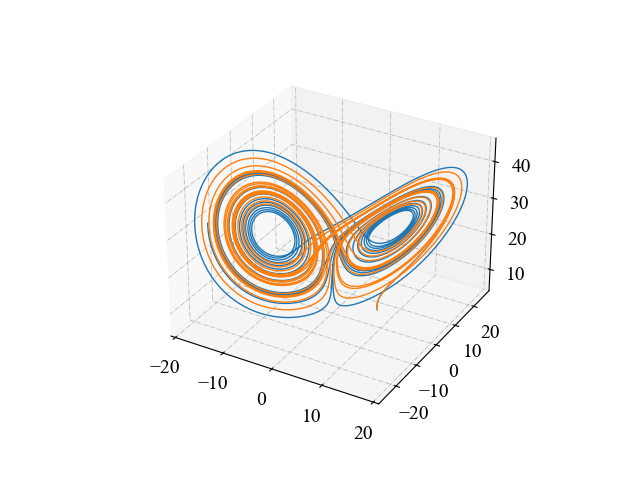

In [357]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(y1[0],y1[1],y1[2])
ax.plot(y2[0],y2[1],y2[2])


In [346]:
np.random.randn(3)*5

array([-0.76750169, -4.03739997, -1.83524594])